## Handing_bad_channels
Tutorial del manejo de los canales malos en MNE-Python

In [2]:
import os
from copy import deepcopy
import numpy as np
import mne

sample_data_folder=mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw=mne.io.read_raw_fif(sample_data_raw_file,verbose=False)


### Marcando los canales malos

In [3]:
print(raw.info['bads'])

['MEG 2443', 'EEG 053']


In [4]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp='EEG 05.')
raw.plot(order=picks, n_channels=len(picks))

Using qt as 2D backend.
Using pyopengl with version 3.1.6


In [5]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp='EEG 05.')
raw.plot(order=picks, n_channels=len(picks))

Using pyopengl with version 3.1.6


In [6]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp='MEG 2..3')
raw.plot(order=picks, n_channels=len(picks))

Using pyopengl with version 3.1.6


In [7]:
raw2=raw.copy()
raw2.info['bads']=[]

Channels marked as bad:
['MEG 2443', 'EEG 053']
Channels marked as bad:
['MEG 2443', 'EEG 053']
Channels marked as bad:
['MEG 2443', 'EEG 053']


## Exclusión de los malos canales
Se utiliza el método pick_types, pero se usa el valor exclude=[]

In [16]:
# default is exclude='bads':
good_eeg = mne.pick_types(raw.info, meg=False, eeg=True) #acá es donde se excluyen los bads
all_eeg = mne.pick_types(raw.info, meg=False, eeg=True, exclude=[])
print(np.setdiff1d(all_eeg, good_eeg))
print(np.array(raw.ch_names)[np.setdiff1d(all_eeg, good_eeg)])

[367]
['EEG 053']


320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated


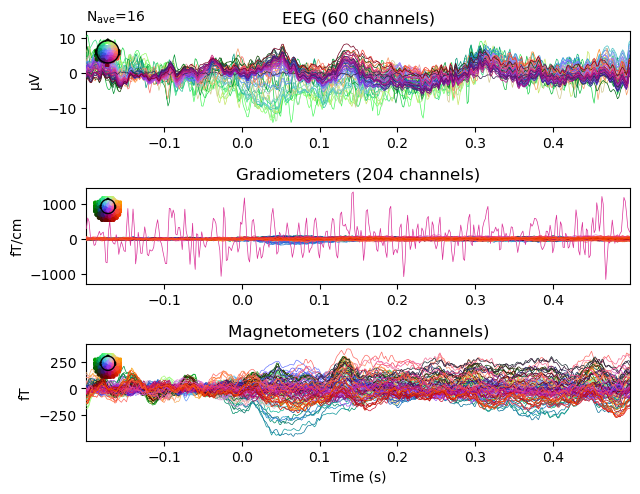

In [14]:
events=mne.find_events(raw2, stim_channel='STI 014')
epochs= mne.Epochs(raw2, events=events)['32'].average().plot()

In [9]:
raw.plot()

Using pyopengl with version 3.1.6


Channels marked as bad:
['MEG 2443', 'EEG 053']


## Interpolación de los malos canales

Reading 0 ... 1802  =      0.000 ...     3.000 secs...
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Interpolating bad channels
    Automatic origin fit: head of radius 91.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Using matplotlib as 2D backend.


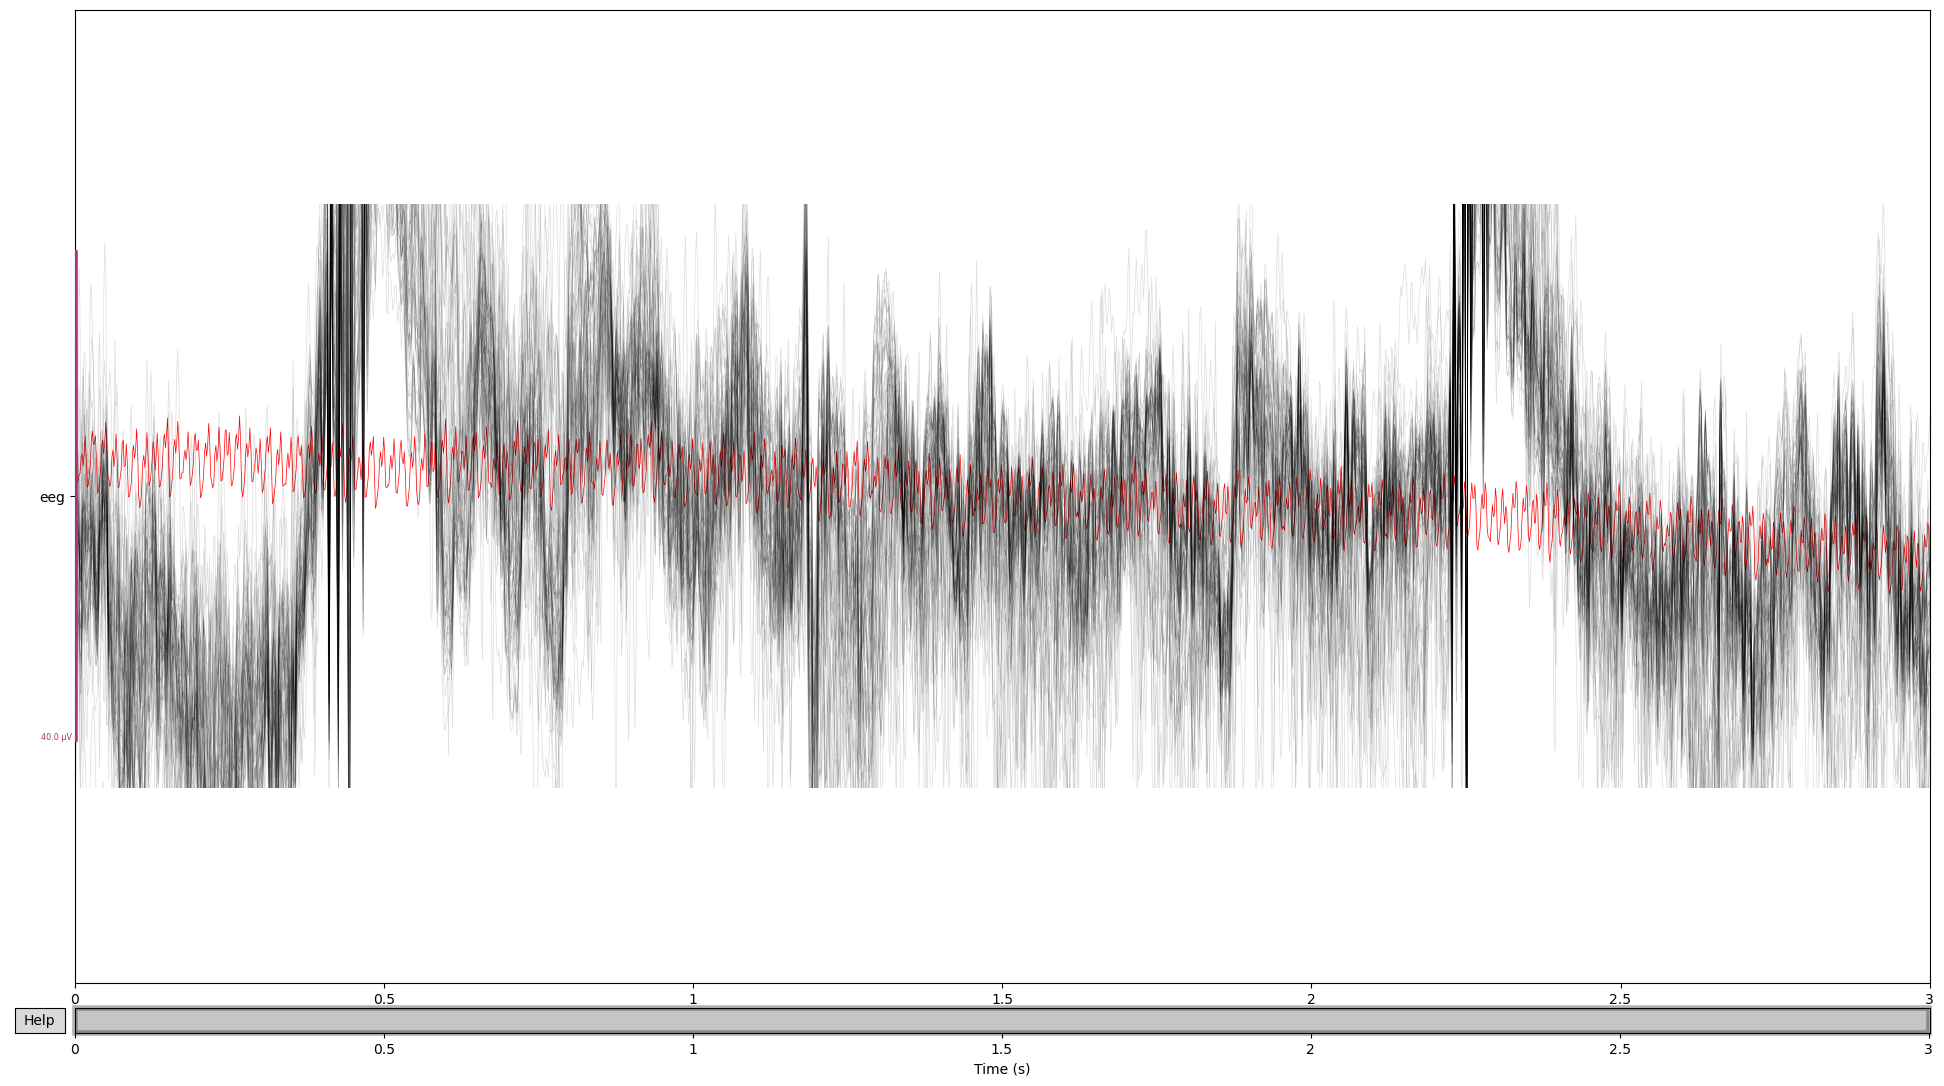

Using qt as 2D backend.
Using matplotlib as 2D backend.


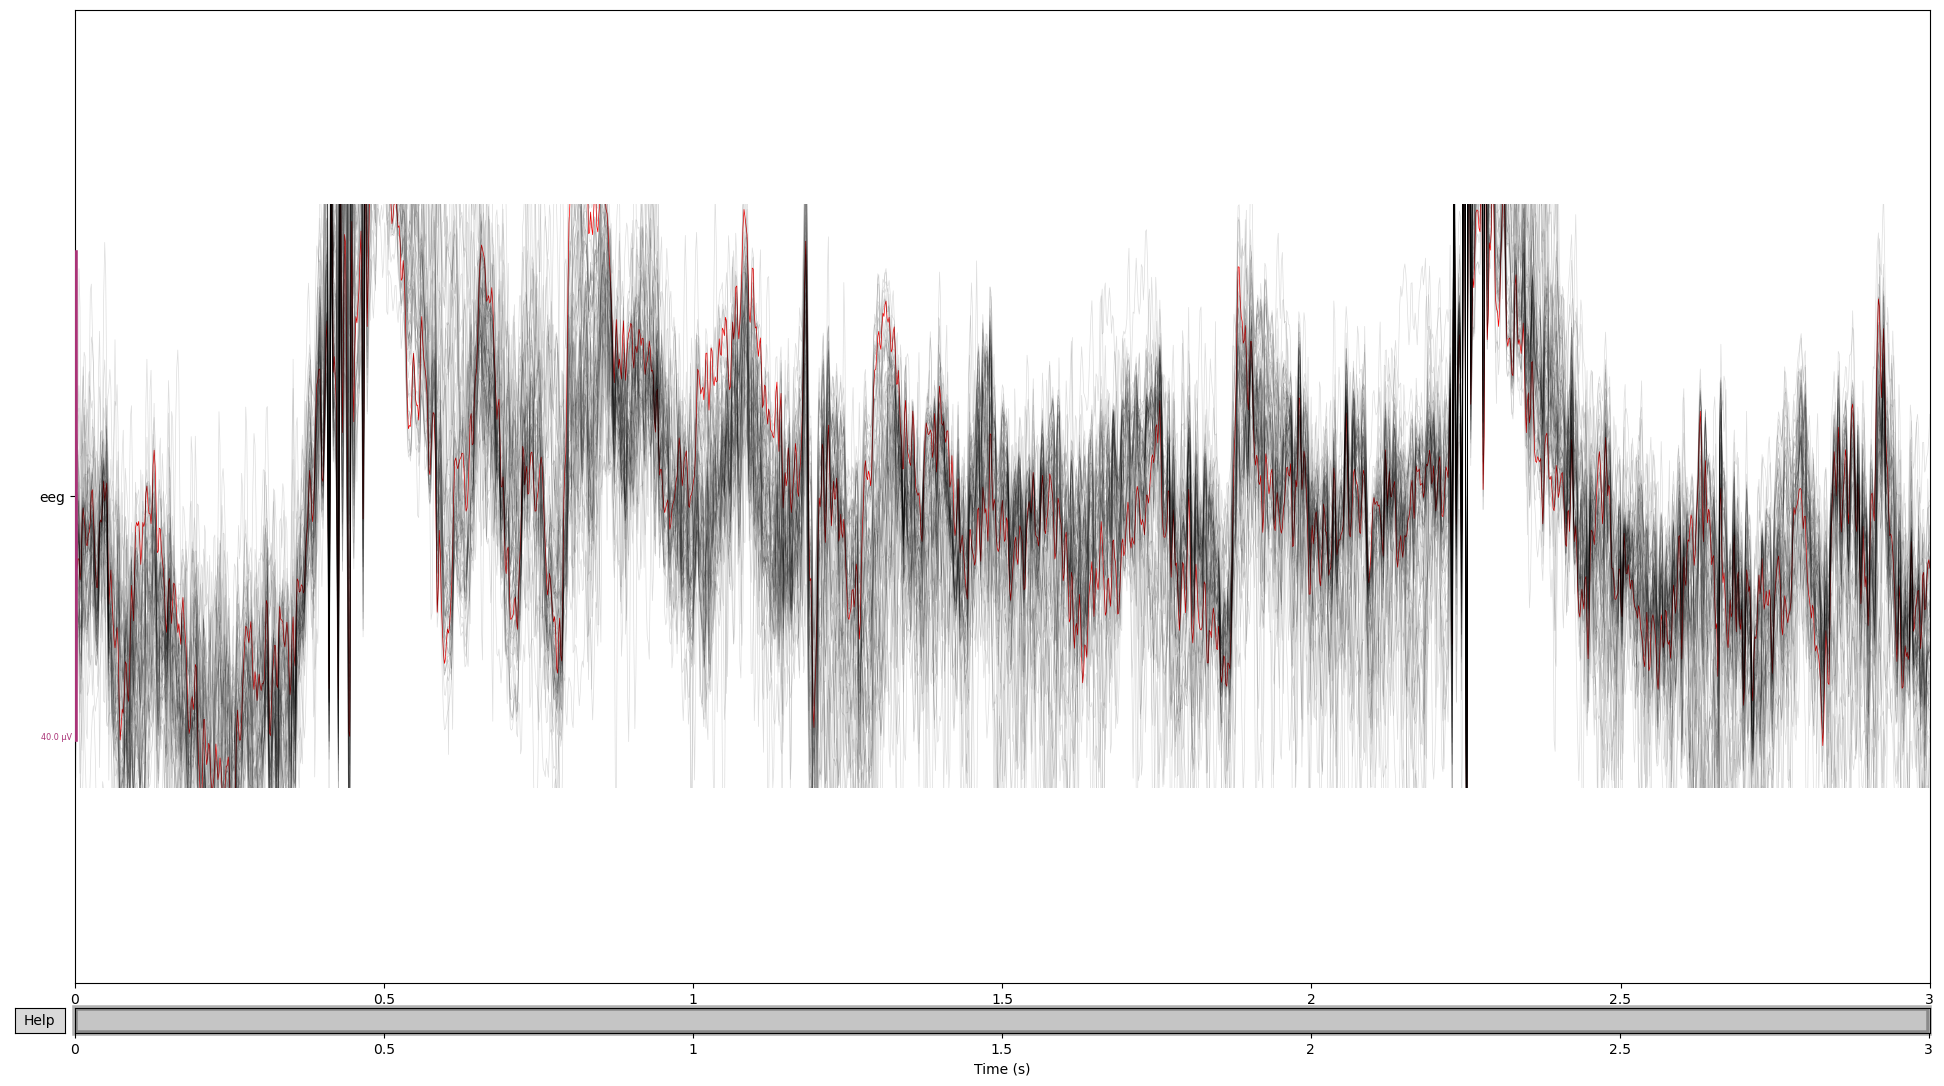

Using qt as 2D backend.


In [13]:
raw.crop(tmin=0, tmax=3).load_data()
eeg_data = raw.copy().pick_types(meg=False, eeg=True, exclude=[])
eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)

for title, data in zip(['orig.', 'interp.'], [eeg_data, eeg_data_interp]):
    with mne.viz.use_browser_backend('matplotlib'):
        fig = data.plot(butterfly=True, color='#00000022', bad_color='r')
    fig.subplots_adjust(top=0.9)
    fig.suptitle(title, size='xx-large', weight='bold')